In [8]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import seaborn as sns
import cartopy as cy
import cartopy.crs as ccrs
from functions import count_ARs

In [4]:
#b'/home/jovyan/Tjaernoe2022-group5/notebooks/Lea/Tjaernoe2022-group5/notebooks/Lea/20352049_AR_detection.nc'
path = '20352049_AR_detection.nc'
ar3550 = xr.open_dataset(path)

In [12]:
def count_ARs(ds, lat_cut):
    '''
    Counts number of AR at each time step. Returns dataset with added coordinate ar_counts_[lat_cut].
    '''
    if lat_cut<0:
        pole_ds = ds.sel(lat= slice(-90, lat_cut))
    else:
        pole_ds = ds.sel(lat= slice(lat_cut, 90))
 
    ar_counts = np.zeros(len(pole_ds.time))
    for i,ts in enumerate(pole_ds.time):
        ll = xr.plot.contour(pole_ds.sel(time=ts).ivt, levels=[0.0,1.0])
        plt.close()
        if len(ll.collections)>1: #You can remove this and next line if you have run it a few times without getting the printout :))
            print('julia was wrong about something, tell her to fix it'+ts)
        nr_ar = len(ll.collections[0].get_paths())
        ar_counts[i] = nr_ar
    ds[f'ar_counts_{lat_cut}']= ar_counts
    return ds

In [20]:
arc= count_ARs(ds = ar3550, lat_cut= 60)
ant = count_ARs(ds = ar3550, lat_cut= -60)
ar3550 = arc.merge(ant)

/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/plot/plot.py:1417: UserWarning: No contour levels were found within the data range.
  primitive = ax.contour(x, y, z, **kwargs)


In [19]:
ar3550

<xarray.Dataset>
Dimensions:        (lat: 96, lon: 144, time: 5475, ar_counts_60: 5475,
                    ar_counts_-60: 5475)
Coordinates:
  * lat            (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon            (lon) float64 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * time           (time) object 2035-01-01 12:00:00 ... 2049-12-31 12:00:00
  * ar_counts_60   (ar_counts_60) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
  * ar_counts_-60  (ar_counts_-60) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Data variables:
    ivt            (lat, time, lon) bool False False False ... False False False

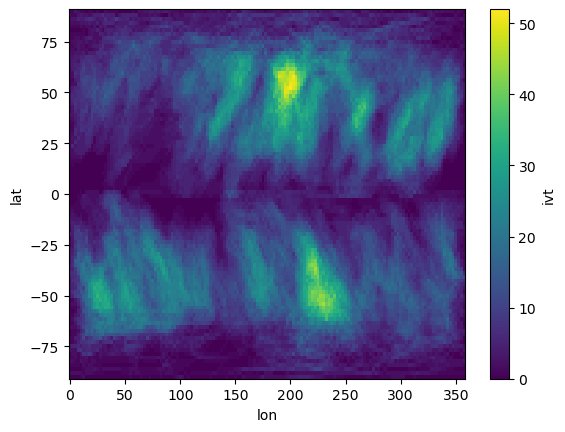

In [16]:
#sum of occurence of atmospheric rivers over the whole year
#ar3550['ivt'].sum('time').plot()

In [26]:
sm = ar3550['ivt'].sum('time')
smarc = sm.sel(lat=slice(50,90))
smant = sm.sel(lat=slice(-90,-50))

In [18]:
sm

<xarray.DataArray 'ivt' (lat: 96, lon: 144)>
array([[0, 0, 0, ..., 0, 0, 0],
       [2, 2, 2, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 3, 3, ..., 2, 3, 2],
       [2, 1, 1, ..., 1, 0, 1],
       [1, 1, 3, ..., 2, 1, 0]])
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5

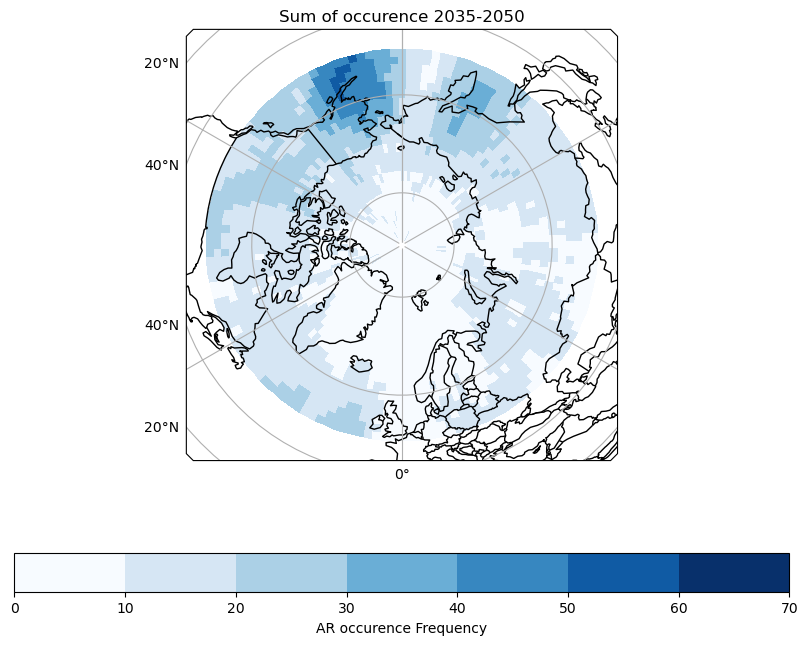

In [31]:

f,ax = plt.subplots(dpi=100, figsize =(10,8),
                    subplot_kw={'projection':ccrs.Orthographic(central_latitude=90.0)})
smarc.plot.pcolormesh(
    cmap = plt.get_cmap('Blues'),ax=ax,
    vmin=0, vmax=70,
    cbar_kwargs={
        'label':'AR occurence Frequency', 
        'orientation':'horizontal',
        
    },
    transform=ccrs.PlateCarree(), 
    x='lon',y='lat',
    levels = 8
)
ax.set_title('Sum of occurence 2035-2050')
ax.coastlines()

gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

ax.add_feature(cy.feature.BORDERS);

<xarray.DataArray 'lat' (lat: 361)>
array([-90. , -89.5, -89. , ...,  89. ,  89.5,  90. ])
Coordinates:
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north
    axis:           Y

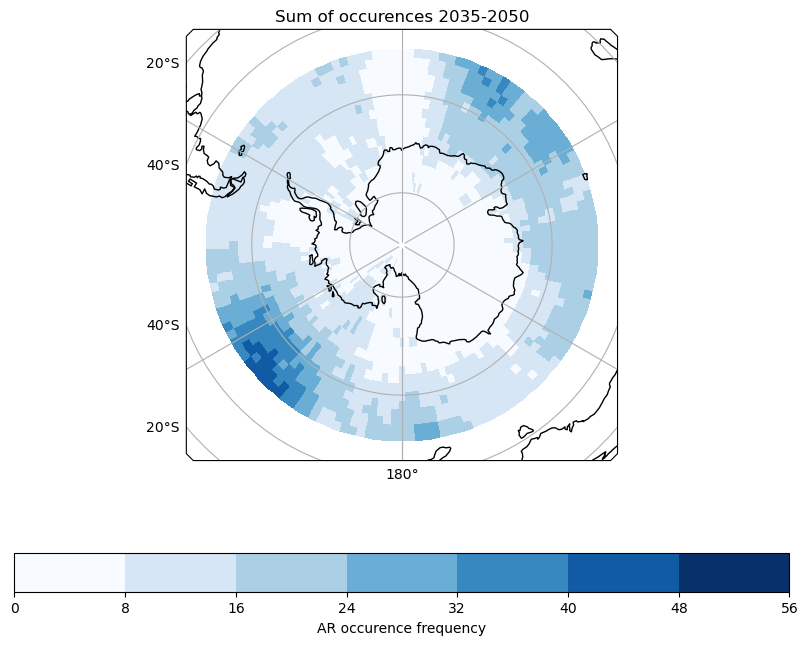

In [32]:
f,ax = plt.subplots(dpi=100, figsize =(10,8),
                    subplot_kw={'projection':ccrs.Orthographic(central_latitude=-90.0)})

smant.plot.pcolormesh(
    cmap = plt.get_cmap('Blues'),ax=ax,
    vmin=0, vmax=56,
    cbar_kwargs={
        'label':'AR occurence frequency', 
        'orientation':'horizontal',
        
    },
    transform=ccrs.PlateCarree(), 
    x='lon',y='lat',
    levels = 8
)
ax.set_title('Sum of occurences 2035-2050')
ax.coastlines()

gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

ax.add_feature(cy.feature.BORDERS);